Introduccion al problema

In [61]:
# %pip install gymnasium

### Windows:

method 1

In [62]:
# %pip install swig

In [63]:
# %pip install gymnasium[box2d]

method 2

In [64]:
# %pip install swig

In [65]:
# %pip install ufal.pybox2d

In [66]:
# %pip install pygame

### Linux:

In [67]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [68]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [69]:
import torch

In [70]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [71]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [72]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [73]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [74]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [75]:
print(lunar.env.action_space.sample())  # Take a random action

0


In [76]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[-1.6320957  -2.1725848  -2.9127312  -9.353745   -2.6238801  -0.77269834
  0.14981997  0.52281886]


Running a random episode.

In [77]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                import time
                time.sleep(0.6)

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    lunar.close()

In [78]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 2, New state: [ 0.010044    1.4216887   0.51185095  0.24959232 -0.01100722 -0.10491178
  0.          0.        ], Reward: -2.9546269827167633, Done: False
Step taken: 1, New state: [ 0.01502972  1.4267148   0.50183356  0.22335948 -0.01423569 -0.06457547
  0.          0.        ], Reward: 1.156814729713575, Done: False
Step taken: 3, New state: [ 0.02008371  1.4311293   0.51040226  0.19614287 -0.01918395 -0.09897424
  0.          0.        ], Reward: -0.7221245058857437, Done: False
Step taken: 2, New state: [ 0.02519102  1.4357762   0.5155192   0.20645621 -0.02392674 -0.09486476
  0.          0.        ], Reward: -2.1000323746134084, Done: False
Step taken: 1, New state: [ 0.03023386  1.4398214   0.5074372   0.1797269  -0.027047   -0.0624109
  0.          0.        ], Reward: 0.9436170983581473, Done: False
Step taken: 0, New state: [ 0.03527689  1.4432665   0.50744534  0.15306129 -0.03016744 -0.06241398
  0.          0.        ], Reward: 0.16193460400256754, Done: False
St

DQN

In [79]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)



Train

In [ ]:
#Los parametros más importantes son los marcados con un comentario
agent = DQNAgent(lunar)
# agent.load_model("modelos/modelo_DQN.h5") <- si se quiere seguir entrenando el modelo anteriormente guardado
agent.train(nombre_archivo="modelos/modelo_DQN", save_graphs=True, save_every_500=True)

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)


Test

In [81]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelos/modelo_DQN.h5")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/modelo_DQN.h5


In [91]:
test_lunar_lander(steps_to_run_before_pause=0, agent=agent, episodes=25)

Episode finished, score: 67.0156213963073
Episode finished, score: 252.18981083470837
Episode finished, score: 201.3248364260896
Episode finished, score: 259.11468295324516
Episode finished, score: 254.44678151383482
Episode finished, score: 261.03158671572015
Episode finished, score: 245.56457410416408
Episode finished, score: 16.189051913597673


KeyboardInterrupt: 

In [83]:
import matplotlib.pyplot as plt

def evaluate_agent(agent, episodes=100):
    rewards = []
    lunar = LunarLanderEnv(render_mode=None)
    
    steps_per_episode =[]

    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0
        while True:
        

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                rewards.append(score)
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        steps_per_episode.append(counter)
        
    # Close the environment
    
    lunar.close()
    print(f"Total steps taken in each episode: {steps_per_episode}")
    print(f"Average steps per episode: {sum(steps_per_episode) / len(steps_per_episode)}")
    return rewards

def calculate_resolution_percentage(rewards):
    """
    Calculates the percentage of episodes where the total score was greater than 100.
    """
    resolved_episodes = sum(1 for reward in rewards if reward >= 100)
    total_episodes = len(rewards)
    if total_episodes == 0:
        return 0
    return (resolved_episodes / total_episodes) * 100


colors = ['#e377c2', '#8c564b', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']



In [84]:
'''
rewards_0 = evaluate_agent(agent)
plt.figure(figsize=(12, 6))
plt.plot(rewards_0, label='Último probado', color=colors[0])
plt.title('Evaluación del agente con la última configuracion en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")
'''

'\nrewards_0 = evaluate_agent(agent)\nplt.figure(figsize=(12, 6))\nplt.plot(rewards_0, label=\'Último probado\', color=colors[0])\nplt.title(\'Evaluación del agente con la última configuracion en 100 episodios\')\nplt.xlabel(\'Episodio\')\nplt.ylabel(\'Recompensa total\')\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\nprint("\n--- Resolution Percentage (Score > 100) ---")\nprint(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")\n'

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 1/modelo_DQN.h5
Episode finished, score: -561.4488703152454
Episode finished, score: -314.6236184172543
Episode finished, score: -547.14330273578
Episode finished, score: -344.47313015950635
Episode finished, score: -399.69035223379575
Episode finished, score: -358.8150255526133
Episode finished, score: -802.321719478315
Episode finished, score: -301.88831603588034
Episode finished, score: -382.03516411366473
Episode finished, score: -298.872798076498
Episode finished, score: -411.0846836151293
Episode finished, score: -582.283560360866
Episode finished, score: -315.17845264178567
Episode finished, score: -294.0175766966655
Episode finished, score: -513.5343352212249
Episode 

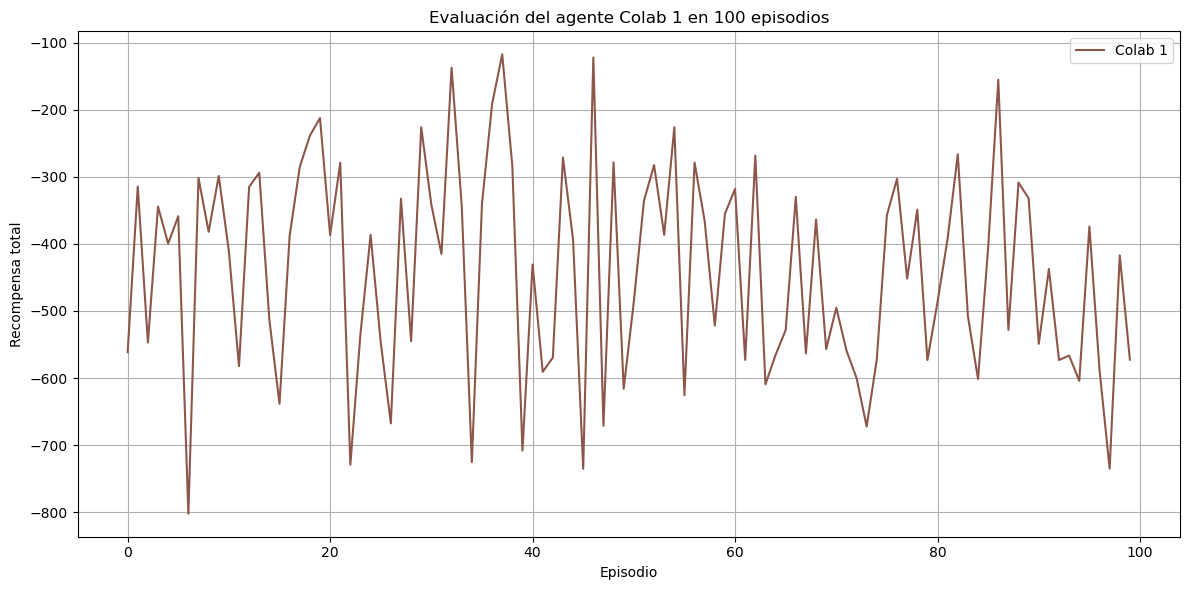


--- Resolution Percentage (Score > 100) ---
Colab 1: 0.00%


In [85]:
agent_colab1 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab1.load_model("modelos/Google colab 1/modelo_DQN.h5")
rewards_1 = evaluate_agent(agent_colab1)
plt.figure(figsize=(12, 6))
plt.plot(rewards_1, label='Colab 1', color=colors[1])
plt.title('Evaluación del agente Colab 1 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 1: {calculate_resolution_percentage(rewards_1):.2f}%")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 2/modelo_DQN.h5
Episode finished, score: -52.355018663742456
Episode finished, score: 263.4939687749995
Episode finished, score: 279.5509565143659
Episode finished, score: 253.66233820451316
Episode finished, score: -40.11404409741412
Episode finished, score: 273.72010087805904
Episode finished, score: 246.74824946934996
Episode finished, score: 223.5357741321156
Episode finished, score: 272.2936298269225
Episode finished, score: 247.12030597669064
Episode finished, score: 246.92172986982789
Episode finished, score: 249.33193217359207
Episode finished, score: 260.55251752225377
Episode finished, score: 238.4380257098449
Episode finished, score: 259.5324033786621
Episode finis

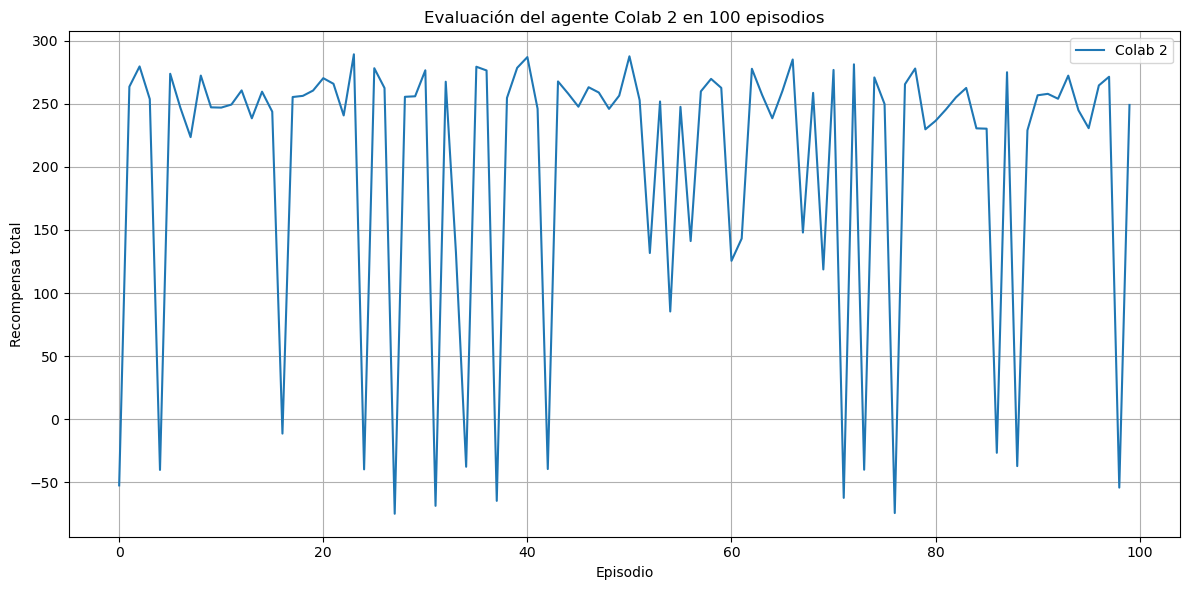


--- Resolution Percentage (Score > 100) ---
Colab 2: 84.00%


In [86]:

agent_colab2 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab2.load_model("modelos/Google colab 2/modelo_DQN.h5")
rewards_2 = evaluate_agent(agent_colab2)
plt.figure(figsize=(12, 6))
plt.plot(rewards_2, label='Colab 2', color=colors[2])
plt.title('Evaluación del agente Colab 2 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 2: {calculate_resolution_percentage(rewards_2):.2f}%")


Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 3/modelo_DQN.h5
Episode finished, score: 1.1095194996644933
Episode finished, score: -34.66937146208089
Episode finished, score: -38.26489133207276
Episode finished, score: 0.7257742086473222
Episode finished, score: -14.10870834067357
Episode finished, score: -3.06145496487806
Episode finished, score: -3.8411668737222358
Episode finished, score: -18.748472048369006
Episode finished, score: 1.2574120408445935
Episode finished, score: -15.724104857645035
Episode finished, score: 26.631682358728447
Episode finished, score: 2.855792656343658
Episode finished, score: -44.706110988905124
Episode finished, score: -13.015212392435025
Episode finished, score: 10.641182539501434
Episo

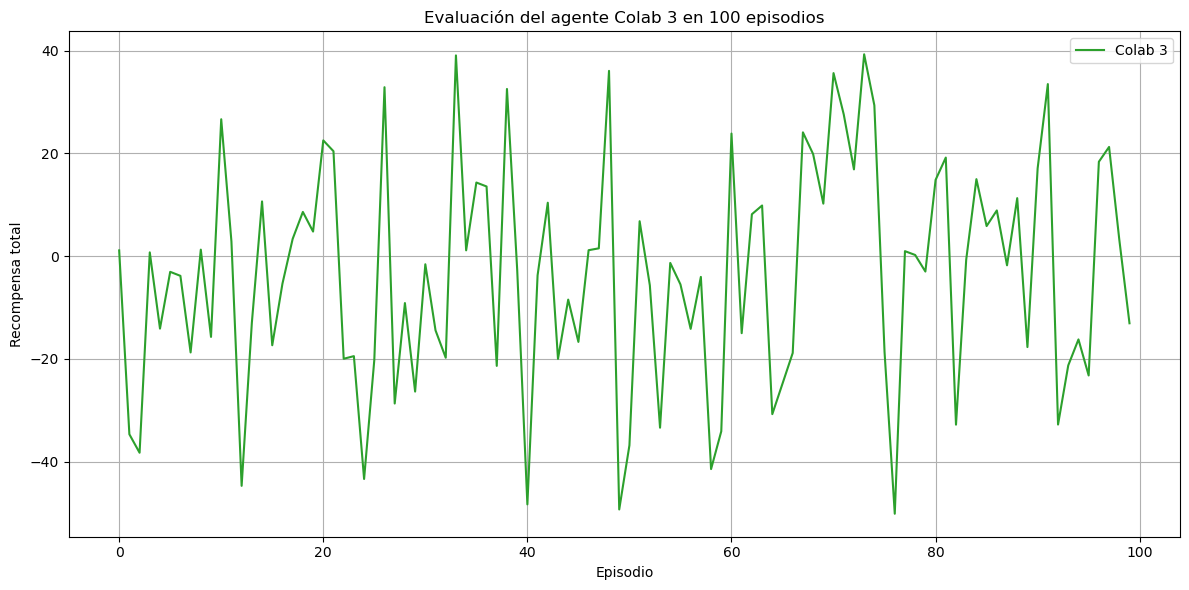


--- Resolution Percentage (Score > 100) ---
Colab 3: 0.00%


In [87]:


agent_colab3 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab3.load_model("modelos/Google colab 3/modelo_DQN.h5")
rewards_3 = evaluate_agent(agent_colab3)
plt.figure(figsize=(12, 6))
plt.plot(rewards_3, label='Colab 3', color=colors[3])
plt.title('Evaluación del agente Colab 3 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 3: {calculate_resolution_percentage(rewards_3):.2f}%")


Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 4/modelo_DQN.h5
Episode finished, score: 271.04842327247434
Episode finished, score: 258.93937584260175
Episode finished, score: 114.13804516546902
Episode finished, score: 122.27020421951563
Episode finished, score: 251.5642915355353
Episode finished, score: 259.7107124663639
Episode finished, score: 67.8226719372509
Episode finished, score: 208.68464374764977
Episode finished, score: 230.68804487087036
Episode finished, score: 260.3594211488986
Episode finished, score: 235.76556593938227
Episode finished, score: 295.8663177774315
Episode finished, score: 233.63024383137258
Episode finished, score: 265.70442535735276
Episode finished, score: 296.310749255956
Episode finished

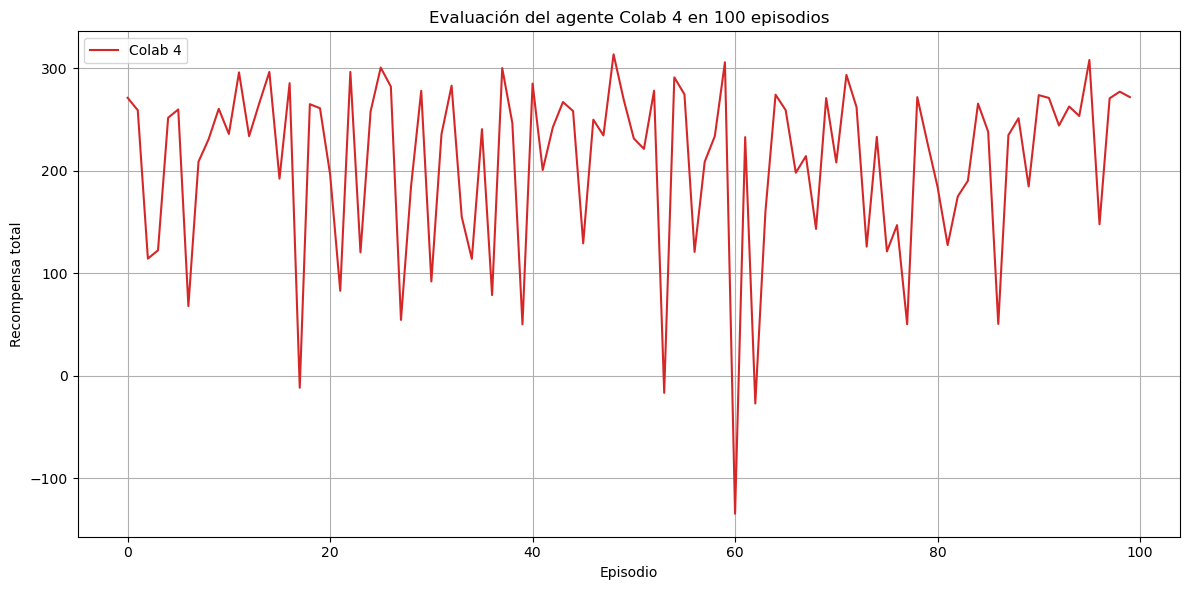


--- Resolution Percentage (Score > 100) ---
Colab 4: 88.00%


In [88]:

agent_colab4 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab4.load_model("modelos/Google colab 4/modelo_DQN.h5")
rewards_4 = evaluate_agent(agent_colab4)
plt.figure(figsize=(12, 6))
plt.plot(rewards_4, label='Colab 4', color=colors[4])
plt.title('Evaluación del agente Colab 4 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 4: {calculate_resolution_percentage(rewards_4):.2f}%")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 5/modelo_DQN.h5
Episode finished, score: -51.660681725177334
Episode finished, score: -48.886346985930714
Episode finished, score: -56.17463860142294
Episode finished, score: -16.89418073885077
Episode finished, score: -120.50040016959345
Episode finished, score: -77.11655862717357
Episode finished, score: -62.22742848541121
Episode finished, score: -72.71025396569306
Episode finished, score: 119.20398337312835
Episode finished, score: -36.8587237324372
Episode finished, score: -68.22864029061223
Episode finished, score: -75.81081497144194
Episode finished, score: -106.11992263742074
Episode finished, score: -117.06866448161313
Episode finished, score: -102.66210194531385
Episode

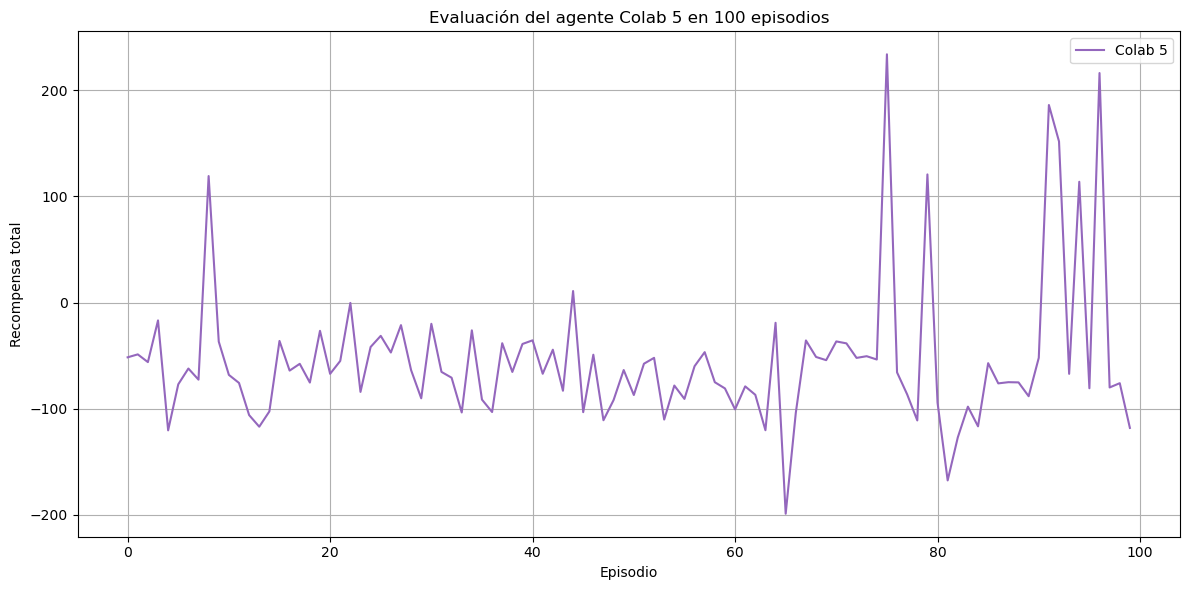


--- Resolution Percentage (Score > 100) ---
Colab 5: 7.00%


In [89]:
agent_colab5 = DQNAgent(lunar,epsilon=0.0, hidden_size=64)
agent_colab5.load_model("modelos/Google colab 5/modelo_DQN.h5")
rewards_5 = evaluate_agent(agent_colab5)
plt.figure(figsize=(12, 6))
plt.plot(rewards_5, label='Colab 5', color=colors[5])
plt.title('Evaluación del agente Colab 5 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 5: {calculate_resolution_percentage(rewards_5):.2f}%")

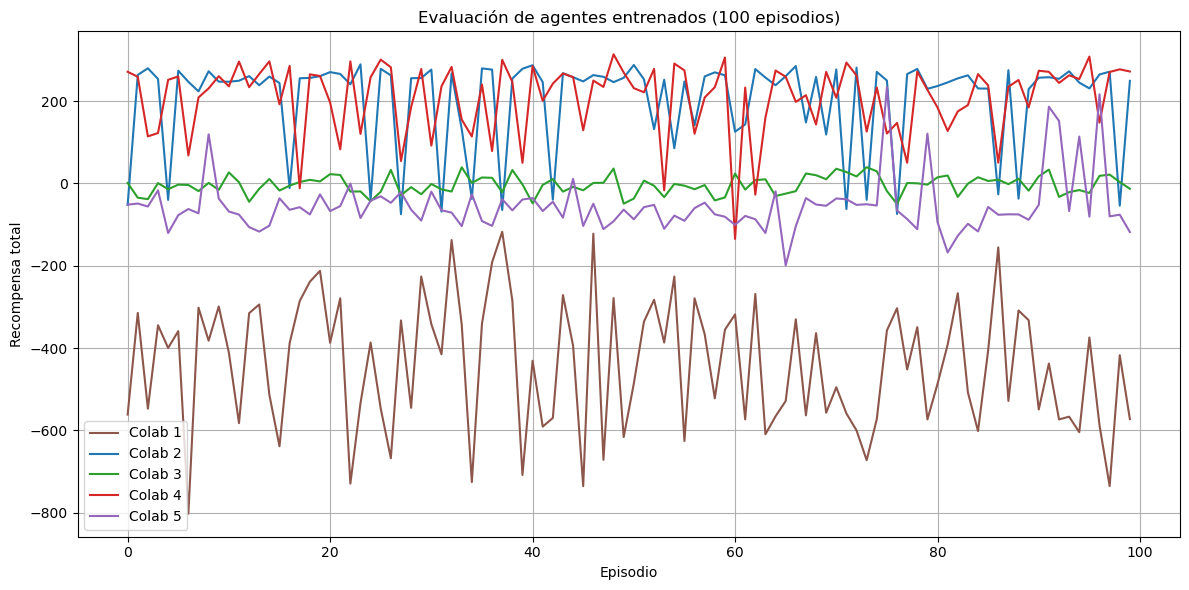


--- Porcentaje de resolución (Recompensa >= 100) ---
Colab 1: 0.00%
Colab 2: 84.00%
Colab 3: 0.00%
Colab 4: 88.00%
Colab 5: 7.00%


In [90]:




plt.figure(figsize=(12, 6))
#plt.plot(rewards_0, label='Último probado', color=colors[0])
plt.plot(rewards_1, label='Colab 1', color=colors[1])
plt.plot(rewards_2, label='Colab 2', color=colors[2])
plt.plot(rewards_3, label='Colab 3', color=colors[3])
plt.plot(rewards_4, label='Colab 4', color=colors[4])
plt.plot(rewards_5, label='Colab 5', color=colors[5])

plt.title('Evaluación de agentes entrenados (100 episodios)')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Porcentaje de resolución (Recompensa >= 100) ---")
#print(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")
print(f"Colab 1: {calculate_resolution_percentage(rewards_1):.2f}%")
print(f"Colab 2: {calculate_resolution_percentage(rewards_2):.2f}%")
print(f"Colab 3: {calculate_resolution_percentage(rewards_3):.2f}%")
print(f"Colab 4: {calculate_resolution_percentage(rewards_4):.2f}%")
print(f"Colab 5: {calculate_resolution_percentage(rewards_5):.2f}%")

